## Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Input Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Input Image

## Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

## Load the Dataset

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Exploratory Data Analysis

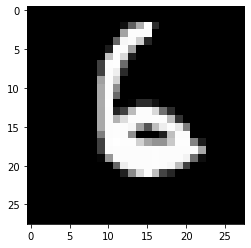

In [15]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

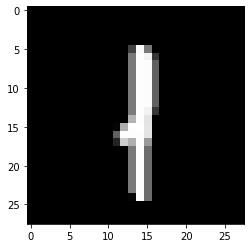

In [16]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

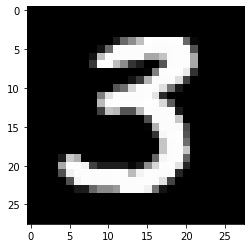

In [18]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation

In [20]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_6 (UpSampling  (None, 14, 14, 16)      

In [21]:
# train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 15s 23ms/step - loss: 0.1729 - val_loss: 0.0876
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0837 - val_loss: 0.0793
Epoch 3/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0785 - val_loss: 0.0761
Epoch 4/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0759 - val_loss: 0.0743
Epoch 5/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0744 - val_loss: 0.0730
Epoch 6/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0733 - val_loss: 0.0727
Epoch 7/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0725 - val_loss: 0.0716
Epoch 8/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0718 - val_loss: 0.0708
Epoch 9/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0712 - val_loss: 0.0704
Epoch 10/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0708 - val_l

## Visualize the Results

In [23]:
# predict the results from model (get compressed images)
pred = model.predict(x_test)

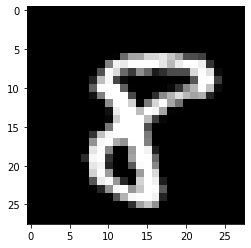

In [22]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

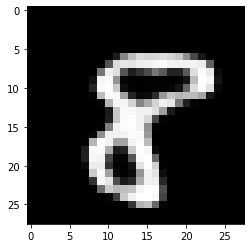

In [24]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

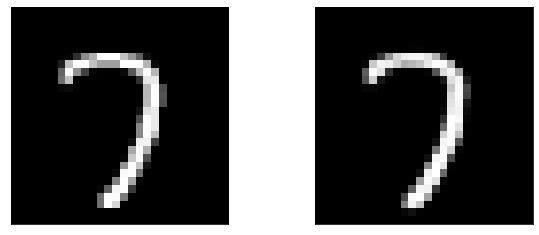

In [28]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

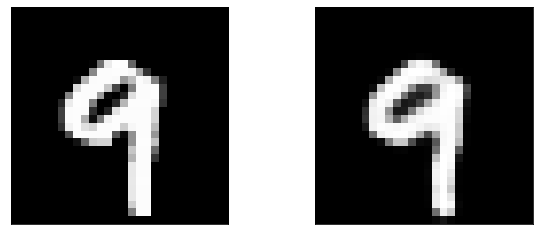

In [29]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()